# kaggle Titanic Dataset

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
PATH = '../data/titanic'

In [4]:
!ls {PATH}

test.csv  train.csv


In [5]:
# Load the dataset
train = pd.read_csv(f'{PATH}/train.csv', index_col='PassengerId')
test = pd.read_csv(f'{PATH}/test.csv', index_col='PassengerId')
print(train.shape)
print(test.shape)
train.head().T

(891, 11)
(418, 10)


PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05
Cabin,NaN,C85,NaN,C123,NaN


In [6]:
# save dependent label and drop from training set
y = train['Survived']
train.drop('Survived', axis=1, inplace=True)

print(train.shape)
print(y.shape)

(891, 10)
(891,)


In [7]:
# combine train and test sets for processing
full = pd.concat([train, test])
print(full.shape)
full.tail().T

(1309, 10)


PassengerId,1305,1306,1307,1308,1309
Pclass,3,1,3,3,3
Name,"Spector, Mr. Woolf","Oliva y Ocana, Dona. Fermina","Saether, Mr. Simon Sivertsen","Ware, Mr. Frederick","Peter, Master. Michael J"
Sex,male,female,male,male,male
Age,NaN,39,38.5,NaN,NaN
SibSp,0,0,0,0,1
Parch,0,0,0,0,1
Ticket,A.5. 3236,PC 17758,SOTON/O.Q. 3101262,359309,2668
Fare,8.05,108.9,7.25,8.05,22.3583
Cabin,NaN,C105,NaN,NaN,NaN
Embarked,S,C,S,S,C


In [8]:
full.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
# drop 'Name' and 'Ticket' columns
data = full.copy()
data.drop(['Name', 'Ticket'], axis=1, inplace=True)

data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [10]:
# convert string columns into categories using fastai 'train_cats' method
train_cats(data)

In [11]:
data.dtypes

Pclass         int64
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin       category
Embarked    category
dtype: object

In [12]:
data.head().T

PassengerId,1,2,3,4,5
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Fare,7.25,71.2833,7.925,53.1,8.05
Cabin,NaN,C85,NaN,C123,NaN
Embarked,S,C,S,S,S


In [13]:
# determine the percentage of missing values
data.isnull().sum().sort_index()/len(train)

Age         0.295174
Cabin       1.138047
Embarked    0.002245
Fare        0.001122
Parch       0.000000
Pclass      0.000000
Sex         0.000000
SibSp       0.000000
dtype: float64

In [14]:
# impute the missing values using fastai 'proc_df' method
df, _, _ = proc_df(data)

print(df.shape)
df.head().T

(1309, 10)


PassengerId,1,2,3,4,5
Pclass,3,1,3,1,3
Sex,2,1,1,1,2
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Fare,7.25,71.2833,7.925,53.1,8.05
Cabin,0,107,0,71,0
Embarked,3,1,3,3,3
Age_na,False,False,False,False,False
Fare_na,False,False,False,False,False


In [15]:
# separate train and test sets
train_subset = df[:891]
test_subset = df[891:]

print(train_subset.shape)
print(test_subset.shape)

(891, 10)
(418, 10)


## Train model and make predictions

In [25]:
from sklearn.metrics import mean_squared_error

m = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)
m.fit(train_subset, y) # train the model

# score the model
score = m.score(train_subset, y)
print('Score (R^2) {:.2f}'.format(score))

# make predictions
pred = m.predict(train_subset)
mse = mean_squared_error(y, pred)
print('RMSE {:.2f}'.format(np.sqrt(mse)))

Score (R^2) 0.99
RMSE 0.12


In [24]:
# calculate the root mean squared error (manually)
def rmse(x, y):
    return np.sqrt(((x - y)**2).mean())

rmse(y.values, pred)

0.11605177063713189

In [17]:
test.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [18]:
# test predictions
test_pred = m.predict(test_subset)

# create submission file
df = pd.DataFrame()
df['PassengerId'] = test.index
df['Survived'] = test_pred
df.to_csv('./predictions/test_results.csv', index=False)

Submission scored 0.74162

## Using ExtraTreesClassifier

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

e = ExtraTreesClassifier(n_jobs=-1, n_estimators=100, random_state=42)
e.fit(train_subset, y)
pred = m.predict(train_subset)

emse = mean_squared_error(y, pred)
print('RMSE {:.2f}'.format(np.sqrt(emse)))

RMSE 0.12


## Using a Single Tree

In [26]:
# calculate R^2 and RMSE
def print_score(m):
    res = [
        rmse(m.predict(X_train), y_train), 
        rmse(m.predict(X_valid), y_valid),
        m.score(X_train, y_train), 
        m.score(X_valid, y_valid)
    ]
    
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [29]:
from sklearn.model_selection import train_test_split

# divide data set into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(
    train_subset,
    y,
    test_size=0.3,
    random_state=42
)

# Single tree estimator
tree = RandomForestClassifier(
    n_estimators=1,
    max_depth=3, # limit size of tree to 3 splits
    bootstrap=False,
    n_jobs=-1
)
tree.fit(X_train, y_train)

print_score(tree)

[0.4388808179809791, 0.4488792012484348, 0.8073836276083467, 0.7985074626865671]


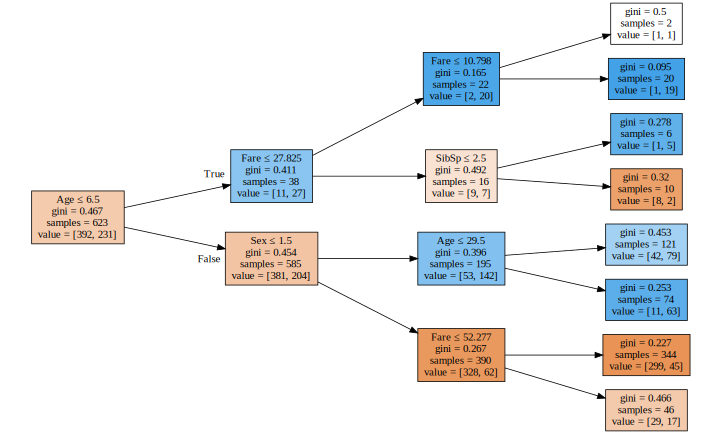

In [30]:
# visualize the tree
draw_tree(tree.estimators_[0], train_subset, precision=3)

In [31]:
# Single tree of greater depth
tree = RandomForestClassifier(
    n_estimators=1,
    max_depth=5, # limit size of tree to 5 splits
    bootstrap=False,
    n_jobs=-1
)
tree.fit(X_train, y_train)

print_score(tree)

[0.4689388998726851, 0.5147090179259814, 0.7800963081861958, 0.7350746268656716]


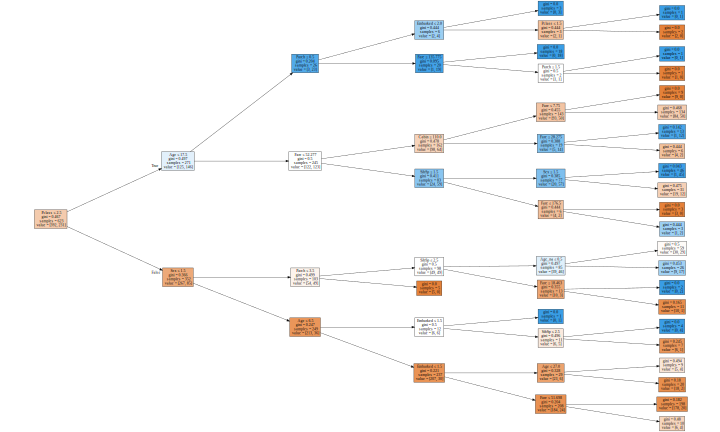

In [32]:
# visualize the tree
draw_tree(tree.estimators_[0], train_subset, precision=3)

In [33]:
# Single tree, no limit on depth
tree = RandomForestClassifier(
    n_estimators=1,
    bootstrap=False,
    n_jobs=-1
)
tree.fit(X_train, y_train)

print_score(tree)

[0.13287776639667082, 0.48484495136659067, 0.9823434991974318, 0.7649253731343284]


The R^2 and RMSE values are better than models where a limit was placed on depth of the tree. In order to improve the model's performance we'll create a forest of **random trees**, using a technique called **bagging**.

## Bagging (Ensembling)

The technique involves creating a number of estimators, eash of which  uses a random subset of the data, so that none are correlated with each other. Each estimator will have a different insight to the data. You then average the results over all the estimators. 

Even when the trees overfit, they all overfit in different ways on different things. Any errors, when they're averaged over all the trees will be equal to `0`.

Determining the number of trees/estimators to use is one of the **hyperparameters** that can be used to 'tune' a random forest model.

We'll build a model with 100 estimators and then plot the R^2 for each.

In [34]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=100)
m.fit(X_train, y_train)
print_score(m)

[0.13287776639667082, 0.4692006540184522, 0.9823434991974318, 0.7798507462686567]


The esimators can be accessed on the model's `estimators_` attribute. We'll compute the predictions of each individual estimator and concatenate them using numpy's `stack` method.

In [35]:
predictions = np.stack([tree.predict(X_valid) for tree in m.estimators_])
predictions

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

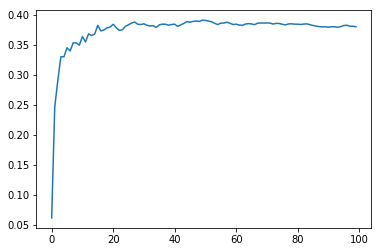

In [36]:
# plot R^2 for all estimators to determine the optimum number
plt.plot([metrics.r2_score(y_valid, np.mean(predictions[:i+1], axis=0)) for i in range(100)]);

The plot suggests the optimum number of estimators is approx. 30.

In [37]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=30)
m.fit(X_train, y_train)
print_score(m)

[0.13878630061776748, 0.47708693159476445, 0.9807383627608347, 0.7723880597014925]


### OOB Score

Sometimes your dataset will be small and you will not want to pull out a validation set because doing so means you now do not have enough data to build a good model. Random Forest's have the **out-of-bag** feature (set through the `oob_score=True` attribute), the model will use the rows not used for training to validate the model. 

One way of identifying over-fitting in 

In [38]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=30, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.14445336159384606, 0.47316022340738384, 0.9791332263242376, 0.7761194029850746, 0.8170144462279294]
